In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flights.csv')
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.drop('Age',axis = 1, inplace = True)
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
# set satisfied as 1 others as 0
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [4]:
df.info

<bound method DataFrame.info of        Inflight wifi service  Departure/Arrival time convenient  \
0                          5                                  4   
1                          1                                  1   
2                          2                                  0   
3                          0                                  0   
4                          2                                  3   
...                      ...                                ...   
25971                      3                                  3   
25972                      4                                  4   
25973                      2                                  5   
25974                      3                                  3   
25975                      2                                  5   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                           3              4               3                4   
1

In [5]:
# This dataset is balanced
df['satisfaction'].value_counts()

satisfaction
0    14573
1    11403
Name: count, dtype: int64

In [6]:
df = df.dropna()

In [7]:
# select x,y
feature = 'satisfaction'

# standardize data
X = df.drop(feature, axis=1)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


y = df[feature]

In [8]:
# fit the model
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [9]:
#evaluate the model
y_pred = lr.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8122272428841771


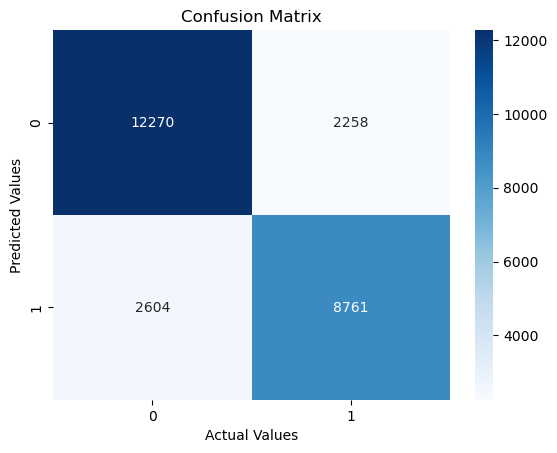

In [10]:
# Confusion matrix
confusion = confusion_matrix(y, y_pred)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

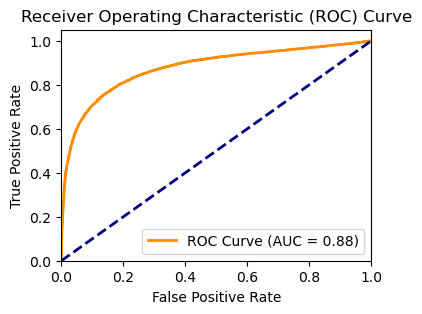

In [11]:
# Get predicted probabilities for the positive class
y_probs = lr.predict_proba(X)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_probs)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y, y_probs)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()